#Laboratorio de predicción lineal

22.46 Procesamiento adaptativo de señales aleatorias

© 2019 Ariel Nowik, Rocío Parra

In [0]:
# Antes de comenzar, importamos las librerias que utilizaremos
# a lo largo del informe

from IPython.display import clear_output
from scipy.io.wavfile import read
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import wave
import math
from IPython.display import Audio
from scipy import signal as sgn
import scipy

In [0]:
# Descargamos los archivos que procesaremos 
! wget "https://drive.google.com/file/d/1vlU5N1w74P5oTBBVWncI0A0nwOFMQ-NK/view" -o "aa.wav"
! wget "https://drive.google.com/open?id=1vl79R_MoIhpv1Vj5Uf0b9nAvwqtUtmxX" -o "sh.wav"

In [0]:
# Definiciones de funciones genericas

def get_signal(wav_path):
    f = read(wav_path)
    signal = np.array(f[1],dtype=float) 
    if len(np.shape(datos))>1: # if stereo
        left = signal[:, 0]
        right = signal[:, 1]
        signal = (left + right)/2  # average for mono
    return signal/np.linalg.norm(signal)  # return normalized version


In [21]:
# Configuraciones generales
fs = 48000
aa = get_signal("aa.wav")
sh = get_signal("sh.wav")

ValueError: ignored

### Autocorrelación

    

In [0]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]


Calculamos autocorrelacion ruido blanco para probar la función


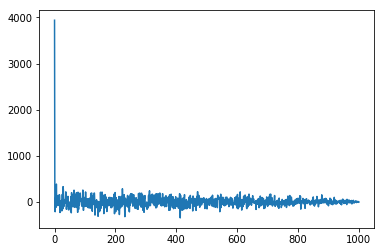

In [25]:
num_samples = 1001
samples = np.random.normal(0, 2, size=num_samples)

corr = autocorr(samples)

plt.plot(corr)
plt.show()

## Levigston Durbin


Entradas


*   $R_{xx}$


Salidas

*   $P[0:M]$ error de predicción orden M
*   Coeficientes $A[0:M]$
*   $K[m]$  





In [0]:

def LevigstonDurbin(r, M):
    a = np.zeros([M+1, M+1])
    p = np.zeros(M+1)
    d = np.zeros(M+1)
    k = np.zeros(M+1)
    
    d[0] = np.conj(r[1])
    p[0] = r[0]
    

    for m in range(M):
        a[m][0] = 1
        
        for k in range(M):
            a[m][k] = a[m-1][k] + k[m] * a[m-1][m-k]
        
        p[m] = p[m-1] * (1-k[m]**2)
    
    return a[m], k, p
    
    

### Probamos el algoritmo



In [0]:
audio = load_audio()

